# Яндекс.Музыка

Сравнение Москвы и Петербурга окружено мифами. Например:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.

На данных Яндекс.Музыки сравним поведение пользователей двух столиц.

**Цель исследования** — проверить четыре гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.
4. У Москвы и Петербурга есть и общее: в рабочее время классическая музыка прослушивается больше, чем утром или вечером.

**Ход исследования**

Данные о поведении пользователей получим из файла `yandex_music_project.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт по следующему плану:

1. [Обзор данных.](#overview)
2. [Предобработка данных.](#preprocessing)
    1. [Стиль заголовков.](#titles)
    2. [Пропуски значений.](#null)
    3. [Дубликаты.](#duplicates) 
3. [Проверка гипотез.](#hipoteses)
    1. [Сравнение поведения пользователей.](#day)
    2. [Музыка в начале и в конце недели.](#week)
    3. [Жанровые предпочтения.](#genre)
    4. [Рабочая музыка.](#classical)
4. [Итоги исследования.](#review)



## Обзор данных

<a id='overview'></a>
Составим первое представление о данных Яндекс.Музыки.




Основной инструмент аналитика — `pandas`. Импортируем эту библиотеку, а также библиотеки, которые понадобятся для визуализации данных.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Прочитаем файл `yandex_music_project.csv` из папки `/datasets` и сохраним его в переменной `df`:

In [2]:
df = pd.read_csv('/datasets/yandex_music_project.csv')

Познакомимся с данными.

In [3]:
display(df.head(10))
display(df.tail(10))
display(df.sample(n=10, random_state=9))

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


,userID,Track,artist,genre,City,time,Day
65069,BE1AAD74,Waterwalk,Eduardo Gonzales,electronic,Moscow,20:38:59,Monday
65070,49F35D53,Ass Up,Rameez,dance,Moscow,14:08:58,Friday
65071,92378E24,Swing it Like You Mean it,OJOJOJ,techno,Moscow,21:12:56,Friday
65072,C532021D,We Can Not Be Silenced,Pänzer,extrememetal,Moscow,08:38:24,Friday
65073,83A474E7,I Worship Only What You Bleed,The Black Dahlia Murder,extrememetal,Moscow,21:07:12,Monday
65074,729CBB09,My Name,McLean,rnb,Moscow,13:32:28,Wednesday
65075,D08D4A55,Maybe One Day (feat. Black Spade),Blu & Exile,hip,Saint-Petersburg,10:00:00,Monday
65076,C5E3A0D5,Jalopiina,NaN,industrial,Moscow,20:09:26,Friday
65077,321D0506,Freight Train,Chas McDevitt,rock,Moscow,21:43:59,Friday
65078,3A64EF84,Tell Me Sweet Little Lies,Monica Lopez,country,Moscow,21:59:46,Friday


,userID,Track,artist,genre,City,time,Day
35217,362C1128,Lost Here,Synkro,dance,Saint-Petersburg,13:01:54,Monday
31321,4F982E72,The Story,Andrew Rai,house,Saint-Petersburg,20:25:20,Wednesday
36918,6BA1F3CE,Wafai Delam,Sadriddin,pop,Moscow,13:58:46,Monday
27577,C96B3074,Is This a Trap?,NaN,miscellaneous,Moscow,20:19:23,Wednesday
47043,59142378,Yo,NaN,electronic,Moscow,09:08:02,Wednesday
53368,2859FEFA,Day In - Day Out,Nelson Riddle,jazz,Moscow,14:21:09,Wednesday
22770,E9CC3B82,Halala,Gevorg Martirosyan,folk,Moscow,14:20:41,Monday
18668,E15DB55,Combination Station,DSurr,drum,Saint-Petersburg,20:08:07,Wednesday
29151,55A0ABED,Минимал,NaN,dance,Moscow,20:36:09,Wednesday
9802,AC0FEB8A,RailRoad Camp,Alex Costa,techno,Saint-Petersburg,14:44:58,Friday


Получим общую информацию о таблице:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
  userID    65079 non-null object
Track       63848 non-null object
artist      57876 non-null object
genre       63881 non-null object
  City      65079 non-null object
time        65079 non-null object
Day         65079 non-null object
dtypes: object(7)
memory usage: 3.5+ MB


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

В названиях колонок видны три нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.
3. Названия не полностью описывают, что хранится в столбце.



Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

<a id='preprocessing'></a>
Исправим стиль в заголовках столбцов, исключим пропуски. Затем проверим данные на дубликаты.

### Стиль заголовков

<a id='titles'></a>
Выведем на экран названия столбцов:

In [5]:
print(df.columns)

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')


Приведём названия в соответствие с хорошим стилем:
* несколько слов в названии запишем в «змеином_регистре»,
* все символы сделаем строчными,
* устраним пробелы.

Для этого переименуем колонки так:
* `'  userID'` → `'user_id'`;
* `'Track'` → `'track'`;
* `'  City  '` → `'city'`;
* `'Day'` → `'day'`.

In [6]:
df = df.rename(columns={'  userID': 'user_id',
                       'Track': 'track',
                       '  City  ': 'city',
                       'Day': 'day'})

Проверим результат. Для этого ещё раз выведем на экран названия столбцов:

In [7]:
print(df.columns)

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')


### Пропуски значений

<a id='null'></a>
Сначала посчитаем, сколько в таблице пропущенных значений. Для этого достаточно двух методов `pandas`:

In [8]:
print(df.isna().sum())

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64


Не все пропущенные значения влияют на исследование. Так в `track` и `artist` пропуски не важны для нашей работы. Достаточно заменить их явными обозначениями.

Но пропуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Придётся:
* заполнить и эти пропуски явными обозначениями,
* оценить, насколько они повредят расчётам. 

Заменим пропущенные значения в столбцах `track`, `artist` и `genre` на строку `'unknown'`. Для этого создадим список `columns_to_replace`, переберём его элементы циклом `for` и для каждого столбца выполним замену пропущенных значений:

In [9]:
column_to_replace = ['track', 'artist', 'genre']

for column in column_to_replace:
    df[column] = df[column].fillna('unknown')

Убедимся, что в таблице не осталось пропусков. Для этого ещё раз посчитаем пропущенные значения.

In [10]:
print(df.isna().sum())

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64


### Дубликаты

<a id='duplicates'></a>
Посчитаем явные дубликаты в таблице и оценим, какую часть таблицы придётся удалить.

In [11]:
duplicates_count = df.duplicated().sum()
f'Строк-дубликатов: {duplicates_count} - {duplicates_count / len(df):.2%}'

'Строк-дубликатов: 3826 - 5.88%'

Вызовем специальный метод `pandas`, чтобы удалить явные дубликаты:

In [12]:
# удаление явных дубликатов с удалением старых индексов и формированием новых
df = df.drop_duplicates().reset_index(drop=True)

Ещё раз посчитаем явные дубликаты в таблице — убедимся, что полностью от них избавились:

In [13]:
df.duplicated().sum()

0

Теперь избавимся от неявных дубликатов в колонке `genre`. Например, название одного и того же жанра может быть записано немного по-разному. Такие ошибки тоже повлияют на результат исследования.

Выведем на экран список уникальных названий жанров, отсортированный в алфавитном порядке. Для этого:
* извлечём нужный столбец датафрейма, 
* применим к нему метод сортировки,
* для отсортированного столбца вызовем метод, который вернёт уникальные значения из столбца.

In [14]:
print(sorted(df['genre'].unique()))

['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans', 'alternative', 'alternativepunk', 'ambient', 'americana', 'animated', 'anime', 'arabesk', 'arabic', 'arena', 'argentinetango', 'art', 'audiobook', 'author', 'avantgarde', 'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass', 'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks', 'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean', 'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill', 'chinese', 'choral', 'christian', 'christmas', 'classical', 'classicmetal', 'club', 'colombian', 'comedy', 'conjazz', 'contemporary', 'country', 'cuban', 'dance', 'dancehall', 'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr', 'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo', 'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic', 'electropop', 'emo', 'entehno', 'epicmetal', 'estrada', 'ethnic', 'eurofolk', 'european', 'experimental', 'extrememetal', 'fado', 'fairyt

Просмотрим список и найдём неявные дубликаты названия `hiphop`. Это могут быть названия с ошибками или альтернативные названия того же жанра.

Можно увидеть следующие неявные дубликаты:
* *hip*,
* *hop*,
* *hip-hop*.

Чтобы очистить от них таблицу, напишем функцию `replace_wrong_genres()` с двумя параметрами: 
* `wrong_genres` — список дубликатов,
* `correct_genre` — строка с правильным значением.

Функция должна исправить колонку `genre` в таблице `df`: заменить каждое значение из списка `wrong_genres` на значение из `correct_genre`.

In [15]:
def replace_wrong_genres(wrong_genres, correct_genre):
    for wrong_genre in wrong_genres:
        df['genre'] = df['genre'].replace(wrong_genre, correct_genre)

Вызовем `replace_wrong_genres()` и передадим ей такие аргументы, чтобы она устранила неявные дубликаты: вместо `hip`, `hop` и `hip-hop` в таблице должно быть значение `hiphop`:

In [16]:
uncorrect = ['hip', 'hop', 'hip-hop']

replace_wrong_genres(uncorrect, 'hiphop')

Проверим, что заменили неправильные названия:

*   hip
*   hop
*   hip-hop

Выведем отсортированный список уникальных значений столбца `genre`:

In [17]:
print(sorted(df['genre'].unique()))

['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans', 'alternative', 'alternativepunk', 'ambient', 'americana', 'animated', 'anime', 'arabesk', 'arabic', 'arena', 'argentinetango', 'art', 'audiobook', 'author', 'avantgarde', 'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass', 'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks', 'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean', 'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill', 'chinese', 'choral', 'christian', 'christmas', 'classical', 'classicmetal', 'club', 'colombian', 'comedy', 'conjazz', 'contemporary', 'country', 'cuban', 'dance', 'dancehall', 'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr', 'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo', 'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic', 'electropop', 'emo', 'entehno', 'epicmetal', 'estrada', 'ethnic', 'eurofolk', 'european', 'experimental', 'extrememetal', 'fado', 'fairyt

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Были исправлены заголовки, чтобы упростить работу с таблицей. 

Без дубликатов исследование станет более точным.

Пропущенные значения заменены на `'unknown'`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез. 

## Проверка гипотез

<a id='hipoteses'></a>

### Сравнение поведения пользователей двух столиц

<a id='days'></a>

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверим это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделим пользователей Москвы и Санкт-Петербурга
* Сравним, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


Сначала выполним каждый из расчётов по отдельности. 

Оценим активность пользователей в каждом городе. Сгруппируем данные по городу и посчитаем прослушивания в каждой группе.



In [18]:
df.groupby('city')['user_id'].count()

city
Moscow              42741
Saint-Petersburg    18512
Name: user_id, dtype: int64

В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

Теперь сгруппируем данные по дню недели и посчитаем прослушивания в понедельник, среду и пятницу. Учтём, что в данных есть информация только о прослушиваниях только за эти дни.


In [19]:
df.groupby('day')['user_id'].count()

day
Friday       21840
Monday       21354
Wednesday    18059
Name: user_id, dtype: int64

В среднем пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.

Стало понятно, как работает группировка по городу и по дням недели. Теперь напишем функцию, которая объединит два эти расчёта.

Создадим функцию `number_tracks()`, которая посчитает прослушивания для заданного дня и города. Ей понадобятся два параметра:
* день недели,
* название города.

В функции сохраним в переменную строки исходной таблицы, у которых значение:
  * в колонке `day` равно параметру `day`,
  * в колонке `city` равно параметру `city`.

Для этого применим последовательную фильтрацию с логической индексацией.

Затем посчитаем значения в столбце `user_id` получившейся таблицы. Результат сохраним в новую переменную. Вернём эту переменную из функции.

In [20]:
def number_tracks(day, city):
    track_list = df[(df['day'] == day) & (df['city'] == city)] 
    track_list_count = track_list['user_id'].count()
    return track_list_count

Вызовем `number_tracks()` шесть раз, меняя значение параметров — так, чтобы получить данные для каждого города в каждый из трёх дней.

In [21]:
number_tracks('Monday', 'Moscow')

15740

In [22]:
number_tracks('Monday', 'Saint-Petersburg')

5614

In [23]:
number_tracks('Wednesday', 'Moscow')

11056

In [24]:
number_tracks('Wednesday', 'Saint-Petersburg')

7003

In [25]:
number_tracks('Friday', 'Moscow')

15945

In [26]:
number_tracks('Friday', 'Saint-Petersburg')

5895

Создадим c помощью конструктора `pd.DataFrame` таблицу, где
* названия колонок — `['city', 'monday', 'wednesday', 'friday']`;
* данные — результаты, полученные с помощью `number_tracks`.

In [27]:
data = [
    ['Moscow', 15740, 11056, 15945],
    ['Saint-Petersburg', 5614, 7003, 5895]
]
columns = ['city', 'monday', 'wednesday', 'friday']

music_city_day = pd.DataFrame(data=data,columns=columns)
music_city_day

,city,monday,wednesday,friday
0,Moscow,15740,11056,15945
1,Saint-Petersburg,5614,7003,5895


**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

<a id='week'></a>

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

Сохраним таблицы с данными в две переменные:
* по Москве — в `moscow_general`;
* по Санкт-Петербургу — в `spb_general`.

In [28]:
moscow_general = df[df['city'] == 'Moscow']
spb_general = df[df['city'] == 'Saint-Petersburg']

Создадим функцию `genre_weekday()` с четырьмя параметрами:
* таблица (датафрейм) с данными,
* день недели,
* начальная временная метка в формате 'hh:mm', 
* последняя временная метка в формате 'hh:mm'.

Функция должна вернуть информацию о топ-10 жанров тех треков, которые прослушивали в указанный день, в промежутке между двумя отметками времени.

In [29]:
def genre_weekday(table, day, time1, time2):
    genre_df = table[(table['day'] == day) & (table['time'] > time1) & (table['time'] < time2)]
    genre_df_count = genre_df.groupby('genre')['user_id'].count()
    genre_df_sorted = genre_df_count.sort_values(ascending=False)
    return genre_df_sorted.head(10)

Cравним результаты функции `genre_weekday()` для Москвы и Санкт-Петербурга в понедельник утром (с 7:00 до 11:00) и в пятницу вечером (с 17:00 до 23:00):

In [30]:
genre_weekday(moscow_general, 'Monday', '07:00', '11:00')

genre
pop            781
dance          549
electronic     480
rock           474
hiphop         286
ruspop         186
world          181
rusrap         175
alternative    164
unknown        161
Name: user_id, dtype: int64

In [31]:
genre_weekday(spb_general, 'Monday', '07:00', '11:00')

genre
pop            218
dance          182
rock           162
electronic     147
hiphop          80
ruspop          64
alternative     58
rusrap          55
jazz            44
classical       40
Name: user_id, dtype: int64

In [32]:
genre_weekday(moscow_general, 'Friday', '17:00', '23:00')

genre
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
alternative    163
classical      163
rusrap         142
Name: user_id, dtype: int64

In [33]:
genre_weekday(spb_general, 'Friday', '17:00', '23:00')

genre
pop            256
rock           216
electronic     216
dance          210
hiphop          97
alternative     63
jazz            61
classical       60
rusrap          59
world           54
Name: user_id, dtype: int64

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

<a id='genre'></a>
Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

Сгруппируем таблицу `moscow_general` по жанру и посчитаем прослушивания треков каждого жанра методом `count()`. Затем отсортируем результат в порядке убывания и сохраним его в таблице `moscow_genres`.

In [34]:
moscow_genres = moscow_general.groupby('genre')['genre'].count().sort_values(ascending=False)

Выведем на экран первые десять строк `moscow_genres`:

In [35]:
moscow_genres.head(10)

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: genre, dtype: int64

Теперь повторим то же и для Петербурга.

Сгруппируем таблицу `spb_general` по жанру. Посчитаем прослушивания треков каждого жанра. Результат отсортируем в порядке убывания и сохраним в таблице `spb_genres`:


In [36]:
spb_genres = spb_general.groupby('genre')['genre'].count().sort_values(ascending=False)

Выведем на экран первые десять строк `spb_genres`:

In [37]:
spb_genres.head(10)

genre
pop            2431
dance          1932
rock           1879
electronic     1736
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: genre, dtype: int64

**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 


### Рабочая музыка

<a id='classical'></a>
Гипотеза: несмотря на некоторые жанровые отличия, и в Москве, и в Петербурге в рабочее время пользователи активнее слушают классическую музыку, так как она помогает сконцентрироваться на работе.

Для проверки создадим функцию, выдающую ТОП-10 популярных жанров в заданное время по отношению ко всем прослушанным композициям. В итоговом списке храним процент жанра от всей музыки.

In [38]:
def genre_time(table, time1, time2):
    genre_df = table[(table['time'] > time1) & (table['time'] < time2)]
    total_count = genre_df['user_id'].count()
    genre_df_count = genre_df.groupby('genre')['user_id'].count() / total_count * 100
    genre_df_sorted = genre_df_count.sort_values(ascending=False)
    return genre_df_sorted.head(10)

Получим ТОП-10 жанров в трёх временных промежутках:

- С 5:00 до 09:00
- С 09:00 до 17:00
- С 17:00 до 23:00

In [39]:
moscow_morning = genre_time(moscow_general, '05:00', '09:00')
moscow_workday = genre_time(moscow_general, '09:00', '17:00')
moscow_evening = genre_time(moscow_general, '17:00', '23:00')

spb_morning = genre_time(spb_general, '05:00', '09:00')
spb_workday = genre_time(spb_general, '09:00', '17:00')
spb_evening = genre_time(spb_general, '17:00', '23:00')

Построим столбчатые диаграммы на основе полученных данных.

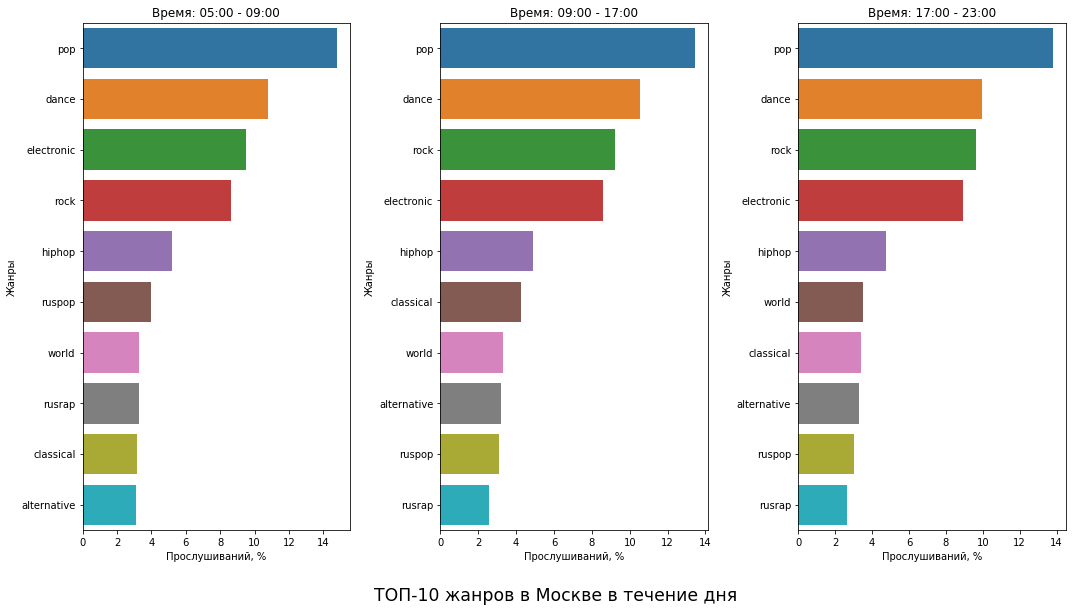

In [40]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 8))

sns.barplot(moscow_morning, moscow_morning.index, ax=axes[0])
axes[0].set_title("Время: 05:00 - 09:00");
axes[0].set_ylabel("Жанры")
axes[0].set_xlabel("Прослушиваний, %")

sns.barplot(moscow_workday, moscow_workday.index, ax=axes[1])
axes[1].set_title("Время: 09:00 - 17:00");
axes[1].set_ylabel("Жанры")
axes[1].set_xlabel("Прослушиваний, %")

sns.barplot(moscow_evening, moscow_evening.index, ax=axes[2])
axes[2].set_title("Время: 17:00 - 23:00");
axes[2].set_ylabel("Жанры")
axes[2].set_xlabel("Прослушиваний, %")

plt.figtext(0.35, -0.05, 'ТОП-10 жанров в Москве в течение дня', fontsize='xx-large')
plt.tight_layout()
plt.show()

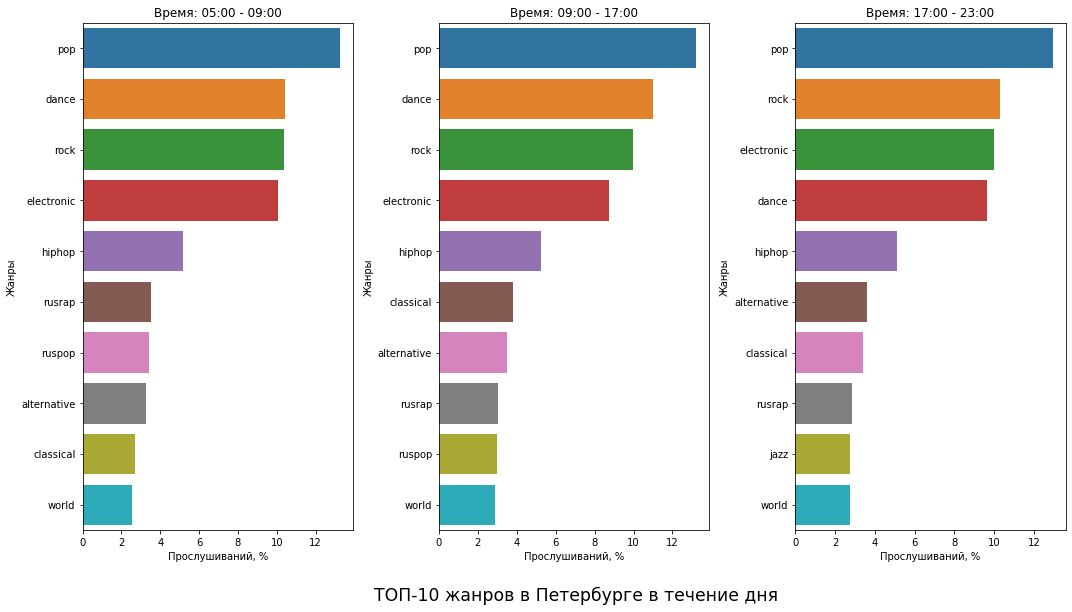

In [41]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 8))

sns.barplot(spb_morning, spb_morning.index, ax=axes[0])
axes[0].set_title("Время: 05:00 - 09:00");
axes[0].set_ylabel("Жанры")
axes[0].set_xlabel("Прослушиваний, %")

sns.barplot(spb_workday, spb_workday.index, ax=axes[1])
axes[1].set_title("Время: 09:00 - 17:00");
axes[1].set_ylabel("Жанры")
axes[1].set_xlabel("Прослушиваний, %")

sns.barplot(spb_evening, spb_evening.index, ax=axes[2])
axes[2].set_title("Время: 17:00 - 23:00");
axes[2].set_ylabel("Жанры")
axes[2].set_xlabel("Прослушиваний, %")

plt.figtext(0.35, -0.05, 'ТОП-10 жанров в Петербурге в течение дня', fontsize='xx-large')
plt.tight_layout()
plt.show()

**Выводы**

Если сравнить топ-10 жанров в течение дня в Москве, можно сделать такие выводы:

1. В течение дня топ-5 жанров остаются практически неизменными (только рок поднимается на строчку выше).

2. Классическая музыка мало популярна утром, но в рабочее время резко поднимается в топе и лишь немного сдаёт позиции вечером. 

3. Жанры `ruspop` и `rusrap` теряют популярность по прошествии утренних часов. А жанры `alternative` и `world` напротив, поднимаются в списке.

Если сравнить топ-10 жанров в течение дня в Санкт-Петербурге, можно сделать такие выводы:

1. В течение дня топ-5 жанров остаются практически неизменными (только танцевальная музыка становится менее прослушиваема).

2. Как и в Москве, классическая музыка мало популярна утром, но в рабочее время резко поднимается в топе и лишь немного сдаёт позиции вечером.

3. Жанры `ruspop` и `rusrap` теряют популярность в течение дня. Им на смену приходят `alternative` и `jazz`.

Таким образом, выдвинутая гипотеза подтвердилась:
* Москва и Петербург несколько различаются в прослушиваемых жанрах, но классическая музыка действительна популярнее в рабочие часы в обоих городах.

При сравнении позиций классической музыки в течение дня можно также предположить, что не самый значительный спад популярности жанра вечером связан именно с продолжением работы (или учебы) на дому, где классическая музыка также используется для фона и концентрации на работе.

## Итоги исследования

<a id='review'></a>

Были проверены четыре гипотезы, установлено:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге.
* в Москве пользователи активнее в понедельник и пятницу,
* в Петербурге подъём активности наблюдается в среду.

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.

3. Несмотря на небольшие жанровые особенности городов, классическая музыка и в Москве, и в Петербурге в рабочее время прослушивается куда чаще.

Четвёртая гипотеза подтвердилась.